<a href="https://colab.research.google.com/github/NassimKhair/NassimKhair/blob/main/Deep_Learning_LSTM_gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install Yahoo Finance
!pip install yfinance

In [ ]:
#Import datetime to format the date
#Formatting the date
from datetime import date, timedelta
days=250
today = date.today()
end_date = today.strftime("%Y-%m-%d")
start_date = date.today() - timedelta(days=days)
start_date = start_date.strftime("%Y-%m-%d")
#Import yahoo finance and pandas
import yfinance as yf
import pandas as pd
#downloading the dataset
df = yf.download('GC=F', start=start_date, end=end_date, progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-27,1928.599976,1928.599976,1928.599976,1928.599976,1928.599976,150902
2023-01-30,1928.300049,1933.599976,1920.300049,1922.900024,1922.900024,27220
2023-01-31,1923.000000,1930.400024,1900.599976,1929.500000,1929.500000,1910
2023-02-01,1927.199951,1955.000000,1922.000000,1927.800049,1927.800049,2290
2023-02-02,1952.300049,1959.099976,1911.300049,1916.300049,1916.300049,748
...,...,...,...,...,...,...
2023-09-27,1871.599976,1871.599976,1871.599976,1871.599976,1871.599976,12251
2023-09-28,1875.500000,1878.199951,1856.699951,1860.400024,1860.400024,4654
2023-09-29,1864.300049,1872.300049,1846.000000,1848.099976,1848.099976,1605


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172 entries, 2023-01-27 to 2023-10-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       172 non-null    float64
 1   High       172 non-null    float64
 2   Low        172 non-null    float64
 3   Close      172 non-null    float64
 4   Adj Close  172 non-null    float64
 5   Volume     172 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 9.4 KB


In [ ]:
#Reset the index
df["Date"] = df.index
df.reset_index(drop=True, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Date
0,1928.599976,1928.599976,1928.599976,1928.599976,1928.60,150902,0
1,1928.300049,1933.599976,1920.300049,1922.900024,1922.90,27220,1
2,1923.000000,1930.400024,1900.599976,1929.500000,1929.50,1910,2
3,1927.199951,1955.000000,1922.000000,1927.800049,1927.80,2290,3
4,1952.300049,1959.099976,1911.300049,1916.300049,1916.30,748,4
...,...,...,...,...,...,...,...
167,1871.599976,1871.599976,1871.599976,1871.599976,1871.60,12251,167
168,1875.500000,1878.199951,1856.699951,1860.400024,1860.40,4654,168
169,1864.300049,1872.300049,1846.000000,1848.099976,1848.10,1605,169
170,1844.099976,1845.900024,1826.699951,1830.000000,1830.00,2309,170


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,1934.705231,1941.958143,1926.723839,1934.083720,1934.083720,4522.453488
std,54.170445,55.599116,53.513694,54.589091,54.589091,23628.505858
min,1808.099976,1808.800049,1808.099976,1808.800049,1808.800049,0.000000
25%,1909.825012,1914.224976,1902.524994,1910.974976,1910.974976,61.000000
50%,1935.799988,1944.700012,1928.899963,1936.000000,1936.000000,211.500000
75%,1969.700043,1977.725006,1962.950043,1970.975006,1970.975006,580.500000
max,2046.400024,2072.000000,2040.000000,2048.000000,2048.000000,194253.000000


In [ ]:
#Format the final price column
df['Adj Close'] = df['Adj Close'].apply(lambda x: '{:.2f}'.format(x))


In [ ]:
#Preparing the data before building the model
# Convert a list into a sequence function

import numpy as np
def create_dataset(serie, window_size=10):
  dataX, dataY = [], []
  for i in range(len(serie)-window_size-1):
    a = serie[i:(i+window_size), 0]
    dataX.append(a)
    dataY.append([serie[i + window_size, 0]])
  return np.array(dataX), np.array(dataY)

#Normalize the gold price data
from sklearn.preprocessing import MinMaxScaler

# Sequence Size
window_size=17

# Select the modified Close Column
closedf=df[['Adj Close']]
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(closedf)

# Data generation
X, y = create_dataset(closedf, window_size)
print("X is:", X)
print("y is:", y)
print("len X is:", len(X))
print("len y is:", len(y))

X is: [[0.50083612 0.47700669 0.50459866 ... 0.13879599 0.13210702 0.10117057]
 [0.47700669 0.50459866 0.49749164 ... 0.13210702 0.10117057 0.09698997]
 [0.50459866 0.49749164 0.44941472 ... 0.10117057 0.09698997 0.03846154]
 ...
 [0.49080268 0.4569398  0.45443144 ... 0.4506689  0.38294314 0.26254181]
 [0.4569398  0.45443144 0.45819398 ... 0.38294314 0.26254181 0.21571906]
 [0.45443144 0.45819398 0.47867893 ... 0.26254181 0.21571906 0.16429766]]
y is: [[0.09698997]
 [0.03846154]
 [0.        ]
 [0.03428094]
 [0.0840301 ]
 [0.1208194 ]
 [0.10326087]
 [0.16262542]
 [0.16346154]
 [0.02132107]
 [0.01630435]
 [0.08570234]
 [0.22240803]
 [0.43018395]
 [0.40719064]
 [0.49247492]
 [0.46070234]
 [0.67307692]
 [0.71237458]
 [0.54013378]
 [0.57692308]
 [0.77341137]
 [0.72449833]
 [0.60033445]
 [0.68394649]
 [0.6576087 ]
 [0.71697324]
 [0.66973244]
 [0.73202341]
 [0.89214047]
 [0.88670569]
 [0.84908027]
 [0.75376254]
 [0.81939799]
 [0.84489967]
 [0.97198997]
 [0.80852843]
 [0.77508361]
 [0.83026756

In [ ]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state = 0, shuffle=True)
X
y

array([[0.09698997],
       [0.03846154],
       [0.        ],
       [0.03428094],
       [0.0840301 ],
       [0.1208194 ],
       [0.10326087],
       [0.16262542],
       [0.16346154],
       [0.02132107],
       [0.01630435],
       [0.08570234],
       [0.22240803],
       [0.43018395],
       [0.40719064],
       [0.49247492],
       [0.46070234],
       [0.67307692],
       [0.71237458],
       [0.54013378],
       [0.57692308],
       [0.77341137],
       [0.72449833],
       [0.60033445],
       [0.68394649],
       [0.6576087 ],
       [0.71697324],
       [0.66973244],
       [0.73202341],
       [0.89214047],
       [0.88670569],
       [0.84908027],
       [0.75376254],
       [0.81939799],
       [0.84489967],
       [0.97198997],
       [0.80852843],
       [0.77508361],
       [0.83026756],
       [0.77926421],
       [0.83110368],
       [0.71362876],
       [0.75376254],
       [0.77424749],
       [0.73954849],
       [0.75710702],
       [0.75794314],
       [0.729

In [ ]:
#Building the LSTM model
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import LSTM
model = Sequential()

 # input Layer
model.add(Input(shape=(window_size, 1)))

# LSTM
model.add(LSTM(units=32, dropout=0.1, activation="relu"))

 # output Layer
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse'])

# Training the model
history = model.fit(X, y, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)

Epoch 1/10
16/16 [==============================] - 2s 32ms/step - loss: 0.2971 - mse: 0.2971 - val_loss: 0.2276 - val_mse: 0.2276
Epoch 2/10
16/16 [==============================] - 0s 10ms/step - loss: 0.1781 - mse: 0.1781 - val_loss: 0.1118 - val_mse: 0.1118
Epoch 3/10
16/16 [==============================] - 0s 11ms/step - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 4/10
16/16 [==============================] - 0s 10ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 5/10
16/16 [==============================] - 0s 8ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 6/10
16/16 [==============================] - 0s 9ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 7/10
16/16 [==============================] - 0s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 8/10
16/16 [==============================] - 0s 9ms/step - loss: 0.0188 - mse: 

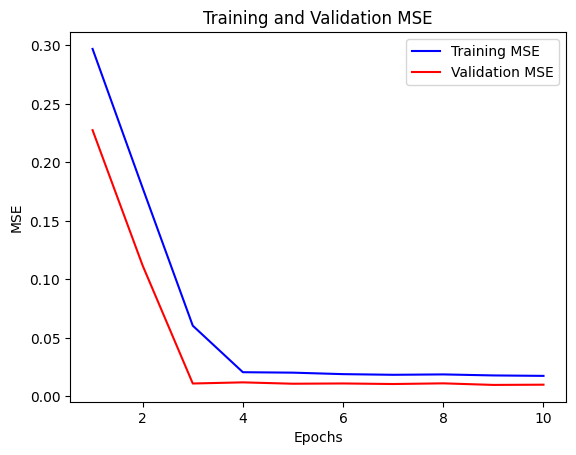

In [ ]:
#Evaluate the model's performance using  Mean Squared Error (MSE)
import matplotlib.pyplot as plt
train_mse = history.history['mse']
val_mse = history.history['val_mse']

 # Epochs number
epochs = range(1, len(train_mse) + 1)
plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
#Generate predictions for the testing set using the trained LSTM model
# number of days in the future
pred_steps = 100

# Predicted Price List
predicted_prices=[]

 # Last Sequence of data
X_pred=[X[-1]]

# converting to numpy
X_pred = np.array(X_pred)

# predicted price day by day
for _ in range(pred_steps):

   # Price Prediction
  prediction = model.predict([X_pred])

 # the pridected price
  price=prediction[0]

  # Add a price prediction to the predicted price list
  predicted_prices.append(price)

  # Add the price to get in the next prediction
  X_pred = np.append(X_pred, [price], axis=1)

  # delete the first value
  X_pred = X_pred[:, 1:]
predicted_prices = np.array(predicted_prices)
predicted_prices = scaler.inverse_transform(predicted_prices)
predicted_prices

1/1 [==============================] - 0s 40ms/step


array([[1906.1425],
       [1907.1487],
       [1908.3538],
       [1909.3271],
       [1910.264 ],
       [1911.1196],
       [1911.9026],
       [1912.485 ],
       [1912.9343],
       [1913.3373],
       [1913.5507],
       [1913.9917],
       [1914.3418],
       [1914.7687],
       [1915.3186],
       [1916.0693],
       [1916.8676],
       [1917.7273],
       [1918.1558],
       [1918.5616],
       [1918.9403],
       [1919.2952],
       [1919.628 ],
       [1919.9424],
       [1920.2385],
       [1920.5204],
       [1920.7887],
       [1921.0453],
       [1921.2931],
       [1921.5305],
       [1921.7592],
       [1921.9766],
       [1922.1827],
       [1922.376 ],
       [1922.5555],
       [1922.7211],
       [1922.8776],
       [1923.0254],
       [1923.1653],
       [1923.2974],
       [1923.4224],
       [1923.5405],
       [1923.6525],
       [1923.7585],
       [1923.8588],
       [1923.9536],
       [1924.0433],
       [1924.1279],
       [1924.208 ],
       [1924.2834],


1/1 [==============================] - 0s 329ms/step
Mean Squared Error (MSE): 0.010007913768658653
Root Mean Squared Error (RMSE): 0.10003956101792257


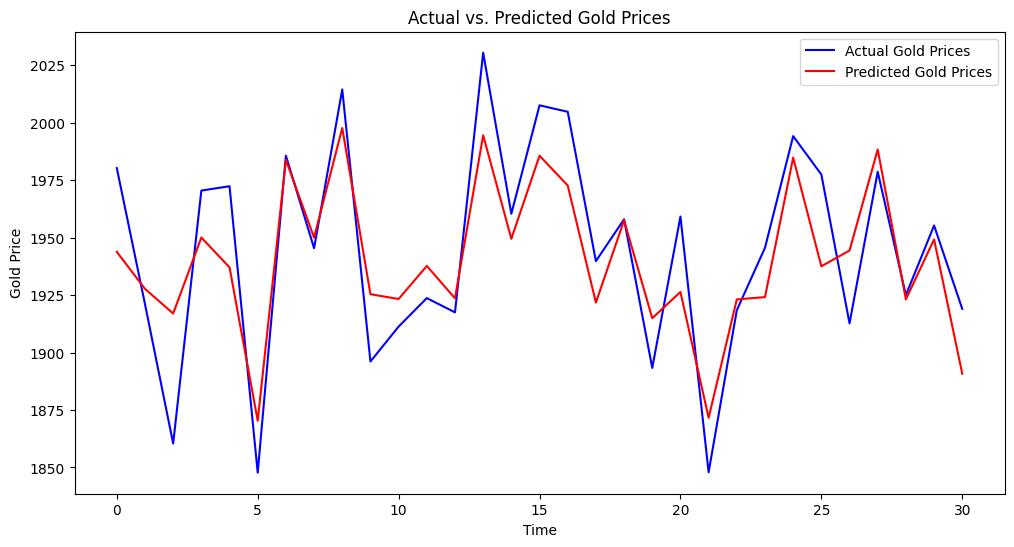

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate predictions for the testing set using the trained LSTM model
y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Inverse transform the scaled predictions and actual values to their original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)



# Visualize the predicted gold prices alongside the actual gold prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Gold Prices', color='blue')
plt.plot(y_pred_inv, label='Predicted Gold Prices', color='red')
plt.title('Actual vs. Predicted Gold Prices')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

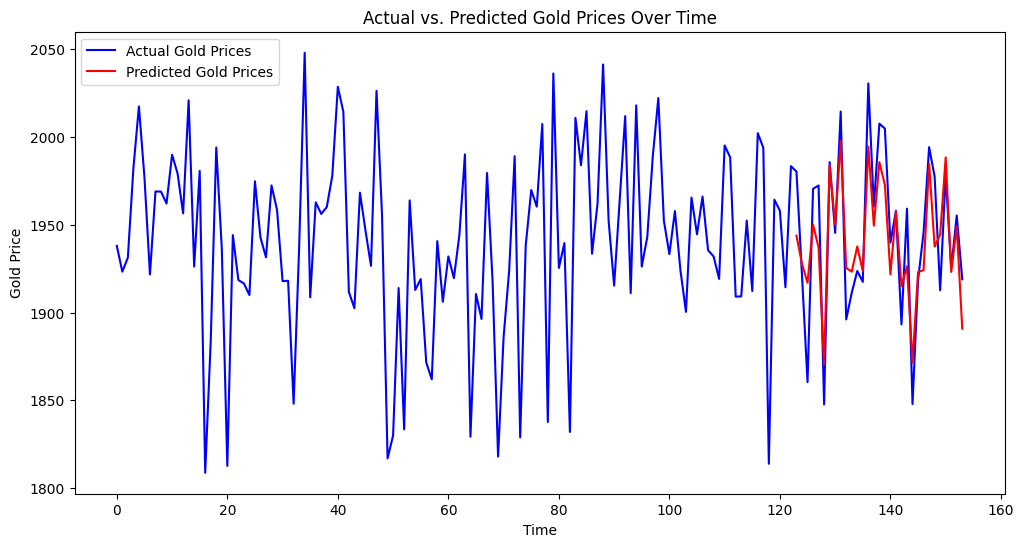

In [ ]:
y_train_inv = scaler.inverse_transform(y_train)
combined_actual = np.concatenate([y_train_inv, y_test_inv])
combined_predicted = np.concatenate([np.full(len(y_train_inv), np.nan), y_pred_inv.reshape(-1)])

# Create a time index for the entire dataset
time_index = list(range(len(combined_actual)))

# Plot the entire time series
plt.figure(figsize=(12, 6))
plt.plot(time_index, combined_actual, label='Actual Gold Prices', color='blue')
plt.plot(time_index, combined_predicted, label='Predicted Gold Prices', color='red')
plt.title('Actual vs. Predicted Gold Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

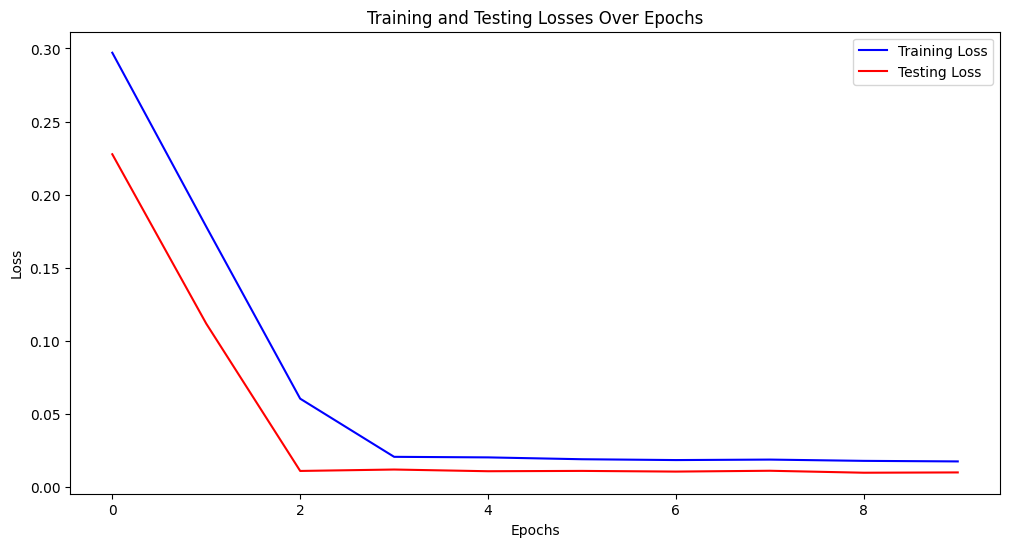

In [ ]:
# Plot Training and Testing Losses
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='red')
plt.title('Training and Testing Losses Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 146ms/step


1/1 [==============================] - 0s 156ms/step


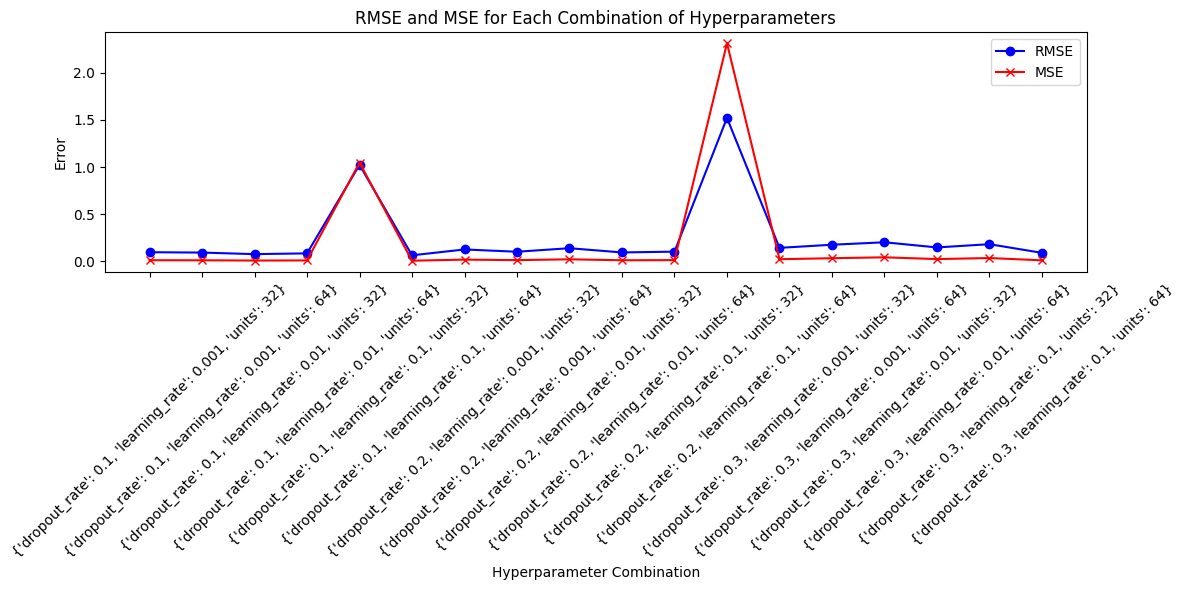

In [ ]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM
from keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt

# Define a function to create and train an LSTM model
def train_lstm_model(X_train, y_train, X_test, y_test, params):
    model = Sequential()
    model.add(Input(shape=(window_size, 1)))
    model.add(LSTM(units=params['units'], dropout=params['dropout_rate'], activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=params['learning_rate']), metrics=['mse'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)

    return rmse, mse, model, history

# Define a grid of hyperparameters to search
param_grid = {
    'units': [32, 64],
    'dropout_rate': [0.1, 0.2, 0.3],
    'learning_rate': [0.001, 0.01, 0.1]
}

results = []  # Store results (RMSE, MSE) for each combination of hyperparameters

# Create empty lists to store RMSE and MSE for each combination
rmse_values = []
mse_values = []

# Iterate through hyperparameter combinations
for params in ParameterGrid(param_grid):
    rmse, mse, model, history = train_lstm_model(X_train, y_train, X_test, y_test, params)
    results.append((params, rmse, mse))

    # Append RMSE and MSE to lists
    rmse_values.append(rmse)
    mse_values.append(mse)

# Create a single graph to display RMSE and MSE for each combination
plt.figure(figsize=(12, 6))
plt.plot(range(len(results)), rmse_values, label='RMSE', color='blue', marker='o')
plt.plot(range(len(results)), mse_values, label='MSE', color='red', marker='x')
plt.title('RMSE and MSE for Each Combination of Hyperparameters')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Error')
plt.xticks(range(len(results)), [str(params) for params, _, _ in results], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame(results, columns=['Hyperparameters', 'RMSE', 'MSE'])

# Display the results in a table
print(results_df)


                                      Hyperparameters      RMSE       MSE
0   {'dropout_rate': 0.1, 'learning_rate': 0.001, ...  0.094018  0.008839
1   {'dropout_rate': 0.1, 'learning_rate': 0.001, ...  0.090153  0.008127
2   {'dropout_rate': 0.1, 'learning_rate': 0.01, '...  0.073619  0.005420
3   {'dropout_rate': 0.1, 'learning_rate': 0.01, '...  0.081757  0.006684
4   {'dropout_rate': 0.1, 'learning_rate': 0.1, 'u...  1.022763  1.046045
5   {'dropout_rate': 0.1, 'learning_rate': 0.1, 'u...  0.061063  0.003729
6   {'dropout_rate': 0.2, 'learning_rate': 0.001, ...  0.123255  0.015192
7   {'dropout_rate': 0.2, 'learning_rate': 0.001, ...  0.099069  0.009815
8   {'dropout_rate': 0.2, 'learning_rate': 0.01, '...  0.136590  0.018657
9   {'dropout_rate': 0.2, 'learning_rate': 0.01, '...  0.091484  0.008369
10  {'dropout_rate': 0.2, 'learning_rate': 0.1, 'u...  0.100026  0.010005
11  {'dropout_rate': 0.2, 'learning_rate': 0.1, 'u...  1.521956  2.316351
12  {'dropout_rate': 0.3, 'learning_ra

In [ ]:
# Combine the training and testing data for retraining on the entire dataset
X_full = np.concatenate((X_train, X_test), axis=0)
y_full = np.concatenate((y_train, y_test), axis=0)

# Create and train the LSTM model on the entire dataset
model = Sequential()
model.add(Input(shape=(window_size, 1)))
model.add(LSTM(units=64, dropout=0.2, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.01), metrics=['mse'])

# Retrain the model on the entire dataset
model.fit(X_full, y_full, epochs=50, batch_size=32, verbose=0)

In [ ]:
# Define the number of future days for forecasting
future_days = 30

# Create an array to store the predicted prices
future_predictions = []

# Initialize the last window with the latest data from the dataset
last_window = X_full[-1]

for _ in range(future_days):
    # Reshape the last window to match the model's input shape
    last_window = last_window.reshape((1, window_size, 1))

    # Make a prediction for the next day
    next_day_prediction = model.predict(last_window)

    # Append the predicted price to the results
    future_predictions.append(next_day_prediction[0, 0])

    # Update the last window by shifting it to the right and adding the new prediction
    last_window = np.roll(last_window, -1, axis=1)
    last_window[0, -1, 0] = next_day_prediction[0, 0]

# Convert the predictions to their original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


1/1 [==============================] - 0s 18ms/step


<Figure size 1600x800 with 0 Axes>

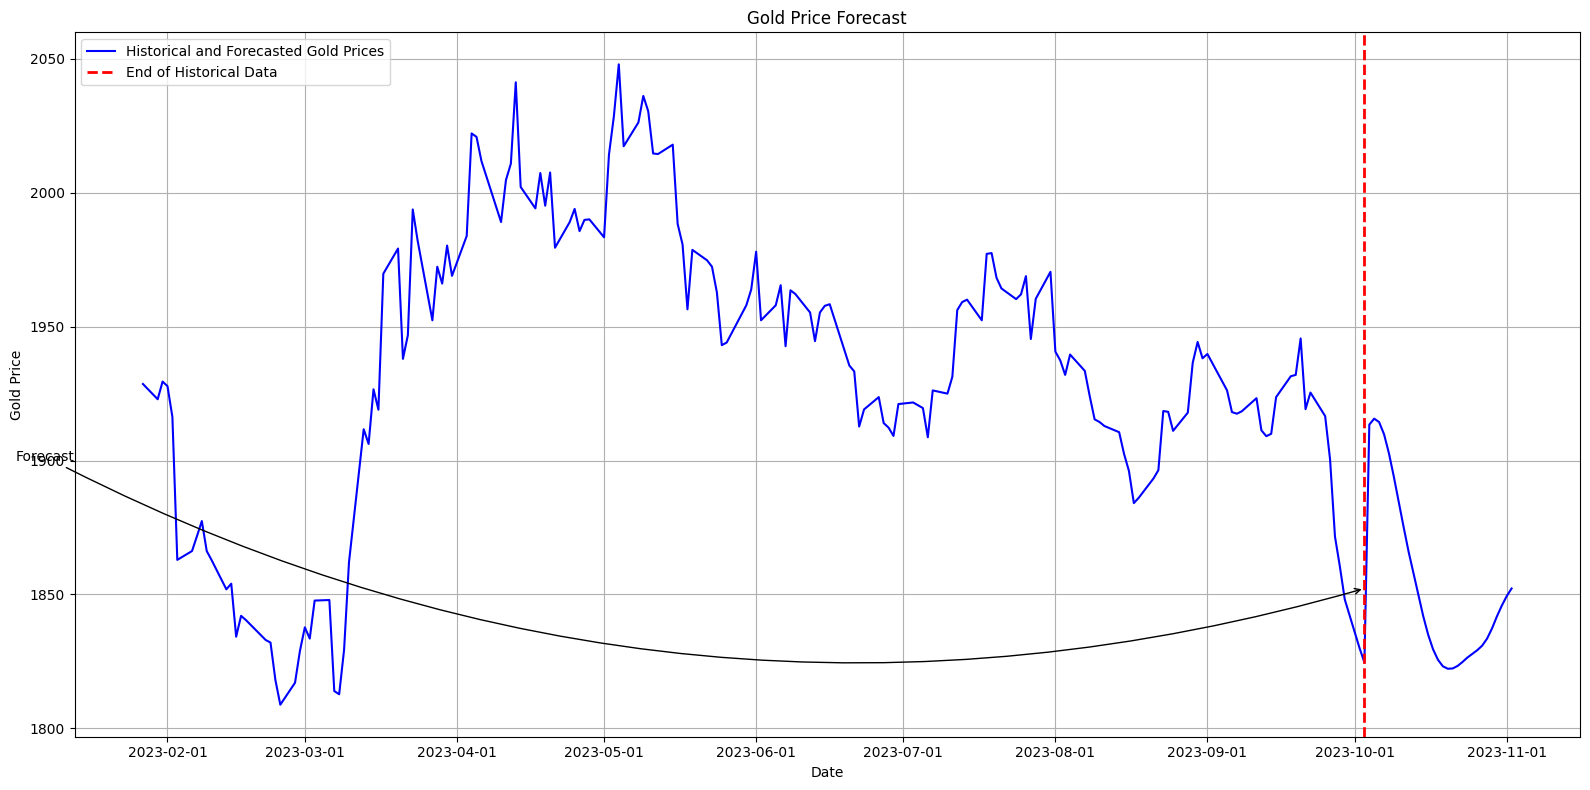

In [ ]:
# Get the dates for the historical data
historical_dates = df["Date"].values

# Generate dates for the future predictions
future_dates = pd.date_range(start=historical_dates[-1], periods=future_days+1, freq='D')

# Combine historical and future dates
all_dates = np.concatenate((historical_dates, future_dates[1:]))

# Reshape future_predictions to 1D array
future_predictions = future_predictions.flatten()
# Combine historical and forecasted prices
all_prices = np.concatenate((df["Adj Close"].values.astype(float), future_predictions))

# Combine historical and forecasted prices as strings

import matplotlib.dates as mdates

# Create a figure with larger dimensions
plt.figure(figsize=(16, 8))

# Plot all_dates against all_prices
plt.figure(figsize=(16, 8))
plt.plot(all_dates, all_prices, label='Historical and Forecasted Gold Prices', color='blue')

# Format the x-axis date labels for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=12))

# Highlight the point where historical data ends and future predictions begin
plt.axvline(x=historical_dates[-1], color='red', linestyle='--', label='End of Historical Data', linewidth=2)
plt.legend()

# Annotate the point with text
plt.annotate('Forecast', xy=(historical_dates[-1], all_prices[-1]), xytext=(mdates.datestr2num('2023-01-01'), 1900),
             textcoords='data', arrowprops=dict(arrowstyle="->", color='black', connectionstyle="arc3,rad=.2"))

plt.title('Gold Price Forecast')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Add a line trace for historical prices
fig.add_trace(go.Scatter(
    x=all_dates,
    y=df["Adj Close"].values.astype(float),
    mode='lines',
    name='Historical Prices',
    line=dict(color='blue', width=2)  # Set the color and width of the line
))

# Add a line trace for forecasted prices
fig.add_trace(go.Scatter(
    x=all_dates[-future_days:],  # Only forecasted dates
    y=future_predictions,
    mode='lines',
    name='Forecasted Prices',
    line=dict(color='red', width=2)  # Set the color and width of the line
))

# Set chart properties
fig.update_layout(
    title='Gold Price Trend (Historical and Forecasted)',
    xaxis_title='Date',
    yaxis_title='Gold Price',
)

# Show the Plotly chart
fig.show()